# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
display(combined_data.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()

display(f"Number of unique mice: {number_of_mice}")

'Number of unique mice: 249'

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Identify duplicate Mouse ID and Timepoint combinations
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Extract unique Mouse IDs from these duplicates
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

# Use repr() to get a string representation that includes dtype
print(repr(duplicate_mouse_ids))

array(['g989'], dtype=object)


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
#-------------------------------------------------------
# Assuming duplicate_mouse_ids contains the IDs of the duplicate mice
# Filter the combined_data for these Mouse IDs
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

print("Data for the duplicate mouse ID(s):")
display(duplicate_mouse_data)

Data for the duplicate mouse ID(s):


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#-------------------------------------------------------------------
# Assuming duplicate_mouse_ids contains the IDs of the duplicate mice
# Create a clean DataFrame by excluding these Mouse IDs
clean_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

print("Clean DataFrame:")
display(clean_data.head())

Clean DataFrame:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
from IPython.display import display, Markdown

# Count the number of unique mice in the clean DataFrame
number_of_mice_clean = clean_data['Mouse ID'].nunique()

# Display the count in bold text in a Jupyter Notebook
display(Markdown(f"**Number of unique mice in the clean DataFrame:** {number_of_mice_clean}"))


**Number of unique mice in the clean DataFrame:** 248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the data by Drug Regimen
grouped_regimen = clean_data.groupby('Drug Regimen')

# Calculate the summary statistics for Tumor Volume
mean_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Generating summary statistics using the aggregation method in a single line
summary_stats_advanced = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
).rename_axis("Drug Regimen").rename_axis("Tumor Volume (mm3)", axis="columns")

summary_stats_advanced

Tumor Volume (mm3),mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

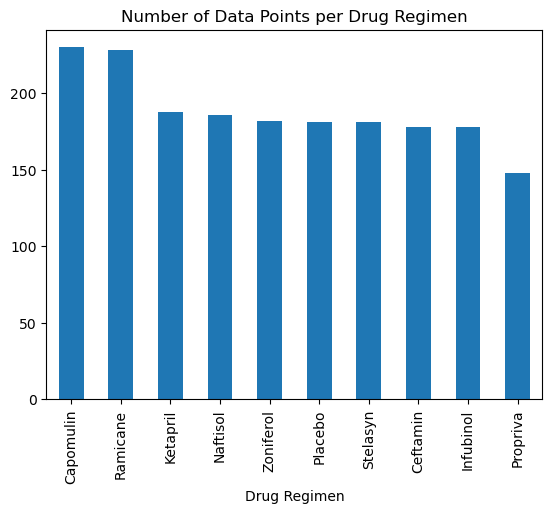

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of data points for each drug regimen and sort them in descending order
regimen_data_points = clean_data.groupby('Drug Regimen').size().sort_values(ascending=False)

# Generate a bar plot showing the number of data points for each drug regimen, sorted from higher to lower
regimen_data_points.plot(kind='bar', title='Number of Data Points per Drug Regimen')

# Show the plot
plt.show()

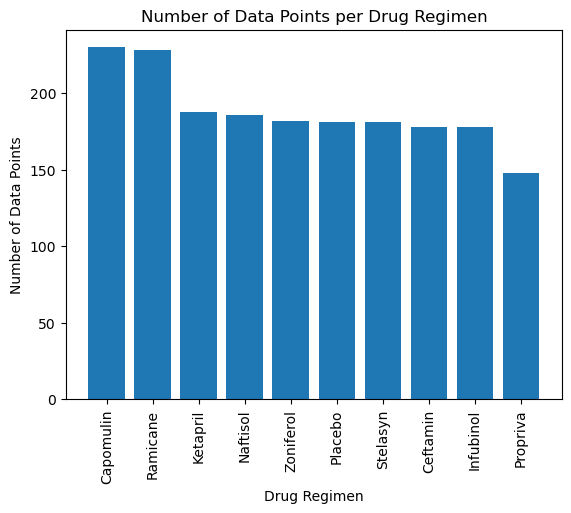

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_data_points = clean_data.groupby('Drug Regimen').size().sort_values(ascending=False)

# Generate a bar plot using pyplot, keeping the style consistent with the pandas plot
plt.bar(regimen_data_points.index, regimen_data_points)
plt.title('Number of Data Points per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)
plt.show()

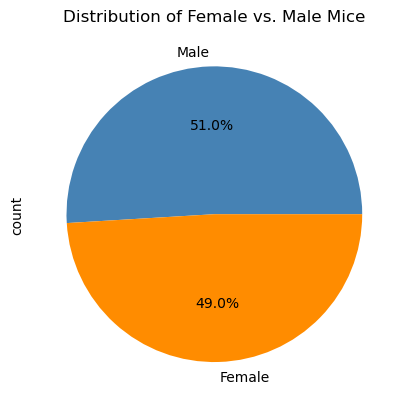

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
sex_distribution = clean_data['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice
sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=['steelblue', 'darkorange'], title='Distribution of Female vs. Male Mice')

# Show the plot
plt.show()

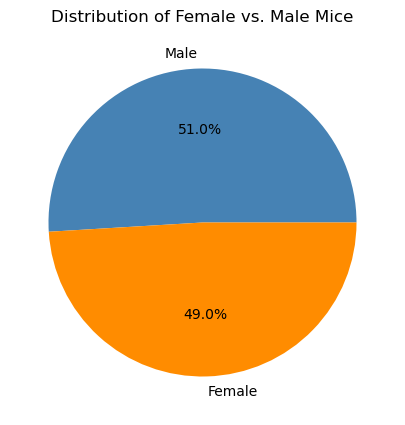

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of female and male mice
sex_distribution = clean_data['Sex'].value_counts()

# Data for plotting
labels = sex_distribution.index
sizes = sex_distribution.values
colors = ['steelblue', 'darkOrange']  # Colors for each section

# Generate the pie plot
plt.figure(figsize=(7, 5))  # Optional: Adjust the figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=360)
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint.head()
# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
specific_treatments = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


for treatment in treatment_list:
    # Locate the rows for each treatment and get the tumor volumes
    treatment_df = specific_treatments[specific_treatments['Drug Regimen'] == treatment]
    tumor_volumes = treatment_df['Tumor Volume (mm3)']

    # Calculate the IQR (Interquartile Range)
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    # Print potential outliers
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


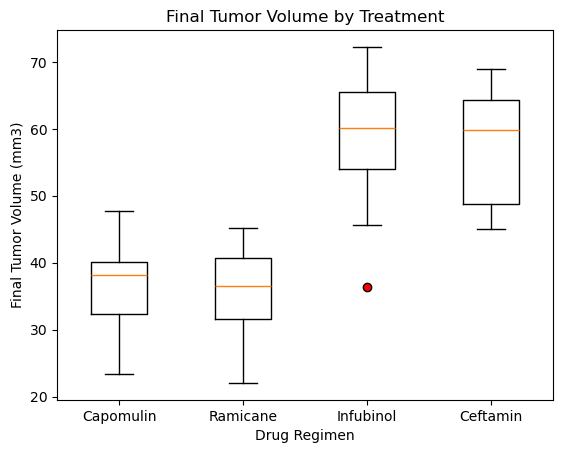

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Extract the last timepoint for each mouse
# Generate a list of tumor volumes for each of the four treatments
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = [specific_treatments[specific_treatments['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] 
                     for treatment in treatment_list]

# Create a box plot for the tumor volumes
plt.figure()
plt.boxplot(tumor_volume_data, labels=treatment_list, flierprops=dict(markerfacecolor='r', marker='o'))

# Add titles and labels
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

# Display the box plot
plt.show()

## Line and Scatter Plots

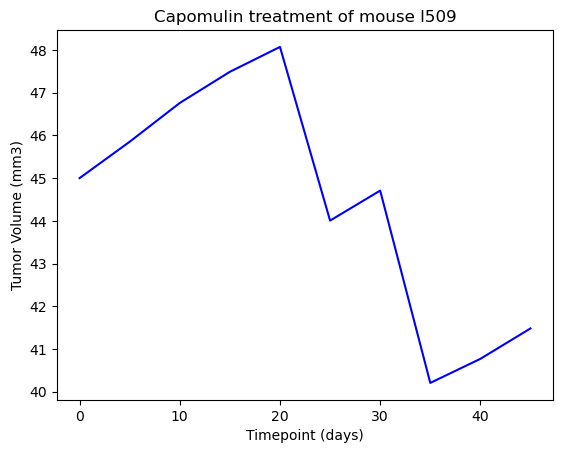

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_data = clean_data[(clean_data['Mouse ID'] == 'l509') & (clean_data['Drug Regimen'] == 'Capomulin')]

# Plotting the data
plt.plot(mouse_l509_data['Timepoint'], mouse_l509_data['Tumor Volume (mm3)'],color='blue', linestyle='-')

# Adding title and labels
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

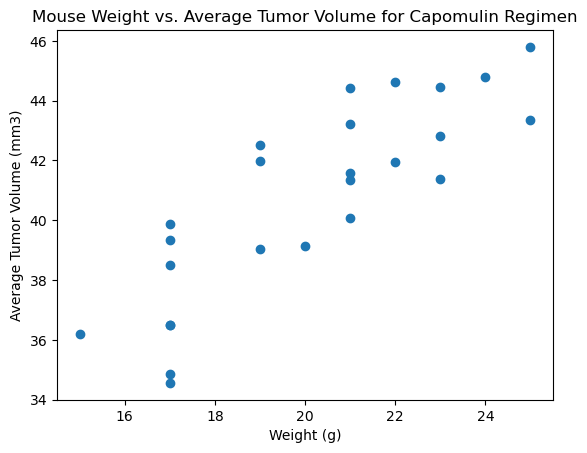

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse under the Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'mean')  # Assuming the weight does not change, we can use mean or take the first
)

# Generate the scatter plot
plt.scatter(average_tumor_volume['Weight'], average_tumor_volume['Average_Tumor_Volume'])

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


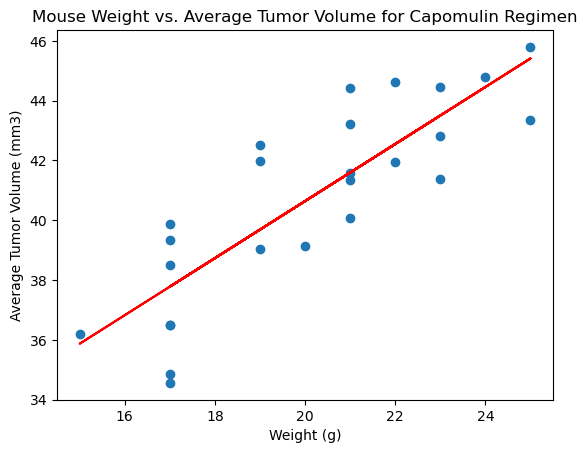

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'mean')  # Assuming the weight does not change, we can use mean or take the first
)

# Scatter plot of mouse weight versus average tumor volume
plt.scatter(average_tumor_volume['Weight'], average_tumor_volume['Average_Tumor_Volume'])

# Calculate the correlation coefficient
correlation = st.pearsonr(average_tumor_volume['Weight'], average_tumor_volume['Average_Tumor_Volume'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation[0]:.2f}")

# Fit a linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_tumor_volume['Weight'], average_tumor_volume['Average_Tumor_Volume'])
regress_values = average_tumor_volume['Weight'] * slope + intercept

# Plot the linear regression line
plt.plot(average_tumor_volume['Weight'], regress_values, "r-")

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()